## softmax
机器学习大致分成 分类，回归  
一般，回归使用恒等函数，二分类使用 sigmoid 函数，多元分类使用 softmax  
$$  
y_k = \frac{exp(a_k)}{\Sigma _{i=1}^{n} exp(a_i)}
$$
$$
\Sigma _{k=1}^{n} y_k = 1
$$  
如果 数组a 中某些的值过大，会导致 exp($a_i$) 的值过大，导致溢出，上式等价为  
$$  
y_k = \frac{exp(a_k - c)}{\Sigma _{i=1}^{n} exp(a_i - c)}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# def softmax(x):
#     """对于单个数据的softmax"""
#     c = np.max(x)
#     exp_a = np.exp(x-c)
#     sum_exp_a = np.sum(exp_a)
#     return exp_a / sum_exp_a


# softmax 实现1
# def softmax(x):
#     if x.ndim == 1:  # x = [1,2,3,4]
#         x = x[None,:] - np.max(x,axis=0) # x = [[1,2,3,4]] - np.max([1,2,3,4]) = [[1,2,3,4]] - 4
#         # 如果是一维的x，最终仍然以二维数组的形式返回，比如返回值是 [[0.2,10,20]]
#     else:
#         x = x - np.max(x, axis=1).reshape(-1,1) # x = [[1,2,3],[2,3,4]] - [3,4].reshape(-1,1) = [[1,2,3],[2,3,4]] - [[3],[4]]

#     return np.exp(x) / np.sum(np.exp(x),axis=1).reshape((-1,1))


# softmax 实现2
def softmax(x):
    """输入一维数组或者二维数组，输入一维返回一维，输入二维返回二维"""
    if x.ndim == 2: # x=[[1,2,3],[2,3,4]]
        x = x.T # x=[[1,2],[2,3],[3,4]]
        x = x - np.max(x,axis=0) # x=x - [3,4] = [[1-3,2-4],[2-3,3-4],[3-3,4-4]] = [[-2,-2],[-1,-1],[0,0]]
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T # 返回二维数组
    # x.ndim == 1 的情况
    x = x-np.max(x)
    return np.exp(x) / np.sum(np.exp(x)) # 返回一维数组比如,ret.shape=(3,)

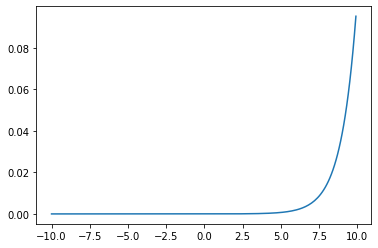

In [2]:
x = np.arange(-10,10,0.1)

plt.plot(x,softmax(x))  # 蓝线
plt.show()

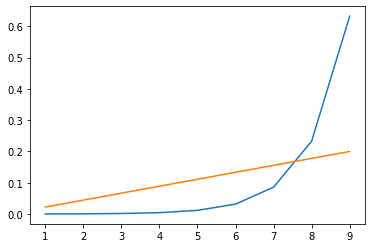

In [3]:
# 对比 softmax 与 线性
x = np.arange(1,10,1)

plt.plot(x,softmax(x))  # 蓝线
plt.plot(x,x/np.sum(x))
plt.show()